In [122]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

In [123]:
#Create arrays of values and build dataframe
schools = np.array((range(1,9)))
avg_grade = np.array ([7.4,7.9,4.1,8.1,6.2,7.1,7.4,6.7])*10
df = pd.DataFrame(data=[schools,avg_grade]).T
df.rename(index=str, columns={0: "schools", 1: "grade"},inplace=True)
df = df.astype(int)

In [124]:
df.dtypes

schools    int32
grade      int32
dtype: object

In [125]:
df['schools'].astype('category')

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
Name: schools, dtype: category
Categories (8, int64): [1, 2, 3, 4, 5, 6, 7, 8]

In [126]:
df.head()

,schools,grade
0,1,74
1,2,79
2,3,41
3,4,81
4,5,62


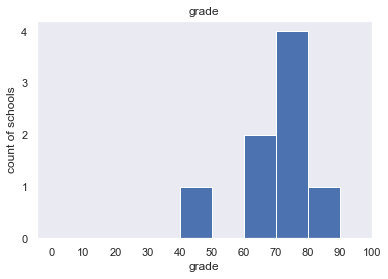

Mode: ModeResult(mode=array([74]), count=array([2]))
mean      68.625
median    72.500
Name: grade, dtype: float64
Mean is lower than median, but still relatively close. An outlier is lowering the mean.
Range: 40
IQR: 9.5
std     12.727221
var    161.982143
Name: grade, dtype: float64


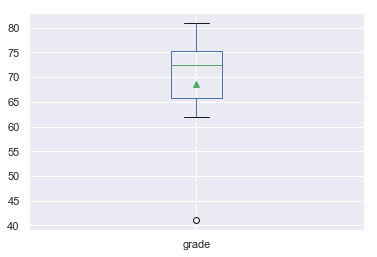

[ 0.45148245  0.87146612 -2.3204098   1.03945959 -0.55647837  0.19949224
  0.45148245 -0.13649469]


In [127]:
#1. What does the distribution look like?
df.hist(column='grade',grid=False,bins=range(0,100,10))
plt.xticks(np.arange(0, 110, step=10))
plt.xlabel('grade')
plt.yticks(np.arange(0,5))
plt.ylabel('count of schools')
plt.show()
#2. What is the center of the distribution?
print('Mode:',stats.mode(df['grade']))
print(df['grade'].agg([np.mean,np.median]))
print("Mean is lower than median, but still relatively close. An outlier is lowering the mean.")
#3. What is the variability of the distribution?
df_range=df['grade'].max()-df['grade'].min()
print('Range:',df_range)
print('IQR:',stats.iqr(df['grade']))
print(df['grade'].agg([np.std,np.var]))
#4. Boxplot
df.boxplot(column='grade',showmeans=True)
plt.show()
#5. Z-Score of school 3
print(stats.zscore(df['grade']))
df['zscore']=stats.zscore(df['grade'])


In [128]:
df

,schools,grade,zscore
0,1,74,0.451482
1,2,79,0.871466
2,3,41,-2.320410
3,4,81,1.039460
4,5,62,-0.556478
5,6,71,0.199492
6,7,74,0.451482
7,8,67,-0.136495


In [129]:
#Calculations for dataframe column
#range=np.max-np.min
df['grade'].agg([np.median,np.mean])
df['grade'].quantile(.25)
df['grade'].describe()

count     8.000000
mean     68.625000
std      12.727221
min      41.000000
25%      65.750000
50%      72.500000
75%      75.250000
max      81.000000
Name: grade, dtype: float64

calculations for numpy arrays
1,2,5,5,6,6,6,9,10,10
q5= np.array([1, 10, 6, 9, 2, 5, 6, 6, 5, 10])
mode =6 stats.mode(q5) checked
median = 6 np.median(q5) checked
mean = 6 np.mean(q5) checked
range = 9 np.max(q5)-np.min(q5) checked
iqr = 3.25 stats.iqr(q5) OR np.quantile(q5,0.75)-np.quantile(q5,0.25) checked
variance = 84/9= 9.3333333 np.var(q5,ddof=1) note ddof is used for sample vs population variance
std = 3.054 np.std(q5,ddof=1) note ddof is used for sample vs population variance

In [130]:
stats.pearsonr(x,y)

(0.9279436074843683, 0.07205639251563169)

In [131]:
x = [50,100,200,300]
y = [50,70,70,95]

In [132]:
np.mean(x)
np.std(x,ddof=1)

110.86778913041725

In [133]:
def compute_r (x,y) :
    """manually compute the pearson coeffient (r) from two arrays"""
    z=0
    zx=0
    zy=0
    for i,j in zip(x,y):
            zx = (i-np.mean(x))/np.std(x,ddof=1)
            zy = (j-np.mean(y))/np.std(y,ddof=1)
            zxzy = zx*zy
            z += zxzy
            r = z/(len(x)-1)
    print(r)
    return(r)

In [134]:
compute_r(x,y)

0.9279436074843681


0.9279436074843681